# Scavenger Hunt Code with Comment Version

## Teammembers:


### Before the start:

- Did you finish all five tutorials posted under `Python Workshops` on myCourses? If not, please first do it.

- Read the instruction `Assignment 3 - Data Scavenger Hunt` and follow what the goal is. Use Slack to exchange understanding.


***

# Code Portion

In [14]:
# In Terminal, run > pwd and obtain the directory address
# Then run: cd 'directory address here'
# Then run the cells one by one
# Add your own comments if you like

import matplotlib.pyplot as plt
import numpy as np

In [15]:
def read_waveforms(LA, RV, RA) :
    infile = open('waveforms.csv', 'r')

    line = infile.readline()
    wf = 0 # which waveform are we trying to read (0 = LA, 1 = RV, 2 = RA)

    while line :
        line = line.strip()
        data = line.split(',')

        for i in range(0, len(data)) : 
            data[i] = float(data[i])

        if(wf == 0) :
            LA.append(data)
        elif(wf == 1) :
            RV.append(data)
        elif(wf == 2) :
            RA.append(data)
        
        wf = (wf + 1) % 3
        line = infile.readline()

    infile.close()

In [16]:
def read_times(TL, TR) :
    infile = open('times.csv', 'r')
    line = infile.readline()
    data = line.strip().split(',')

    for i in range(0, len(data)) : 
        data[i] = float(data[i])

    TL.append(data)

    line = infile.readline()
    data = line.strip().split(',')

    for i in range(0, len(data)) : 
        data[i] = float(data[i])

    TR.append(data)
    infile.close()

In [17]:
# make empty data and time Lists
LA_list = []
RV_list = []
RA_list = []
TL_list = []
TR_list = []

# Run the fns
read_waveforms(LA_list, RV_list, RA_list)

read_times(TL_list, TR_list)

# convert all data and time lists to numpy arrays for plotting
LA = np.array(LA_list)
RV = np.array(RV_list)
RA = np.array(RA_list)
TL = np.array(TL_list[0])
TR = np.array(TR_list[0])

## Your turn to play with code

- Fix, play, obtain plots etc
- Finding effective visualization portion will take your time
- Then you will write up to address the goal / questions in the assignment

In [18]:
"""
create 65 plots (1 for each instance) consisting of 3 supblots apiece: 1 for linear acceleration, 1 for rotational velocity, and 1 for rotational acceleration
"""
def plot_waveforms(LA, RV, RA, TL, TR) :
    for i in range(0, len(LA)):
        # LA subplot
        plt.subplot(311)
        plt.plot(TL, LA[i])
        plt.title("Waveforms for Instance " + str(i+1))
        plt.ylabel("Lin Accel (g)")
        plt.xticks(np.arange(0,55,step=5))

        # RV subplot
        plt.subplot(312)
        plt.plot(TR, RV[i])
        plt.ylabel("Rot Vel (rad/s)")
        plt.xticks(np.arange(0,55,step=5))

        # RA subplot
        plt.subplot(313)
        plt.plot(TR, RA[i])
        plt.ylabel("Rot Accel (rad/s\N{SUPERSCRIPT TWO})")
        plt.xticks(np.arange(0,55,step=5))

        plt.xlabel("Time (ms)")
        plt.savefig("Instance" + str(i+1) + ".png")
        plt.close()

In [19]:
"""
calculates the min, max, and mean of each instance of a waveform
creates a list of mins (the min of each instance is in the list)
creates a list of maxes (the max of each instance is in the list)
creates a list of means (the mean of each instance is in the list)
returns an array of arrays for a waveform
[[min], [max], [mean]]
"""
def features(waveform):
    min = []
    max = []
    mean = []

    for i in range(0, len(waveform)):
        min.append(np.min(waveform[i]))
        max.append(np.max(waveform[i]))
        mean.append(np.mean(waveform[i]))
    
    return [np.array(min), np.array(max), np.array(mean)]

def all_features(LA, RV, RA):
    return np.array([features(LA), features(RV), features(RA)])

In [20]:
"""
returns the min, max, and mean of an array
in this case, the array is a waveform feature (e.g. the list of mins for each instance of LA)
"""
def feature_statistics(waveform_feature):
    return np.min(waveform_feature), np.max(waveform_feature), np.mean(waveform_feature)

In [21]:
"""
Iteratively prints summary statistics of each feature of each waveform
"""
def print_feature_stats(array_of_features): # an array of arrays of arrays [LA[[mins], [maxes], [means]], RV[[mins], [maxes], [means]], RA[[mins], [maxes], [means]]] 
    waveform_name = ["LA", "RV", "RA"]
    min_max_mean = ["M", "P", "A"]

    for i in range(0, len(array_of_features)):
        for j in range(0, len(array_of_features[i])):
            min, max, mean = feature_statistics(array_of_features[i][j]) # the min, max, and mean for each feature for each waveform

            print(min_max_mean[j] + waveform_name[i] + ": min = " + str(min) + ", max = " + str(max) + ", mean = " + str(mean))
        print()

In [22]:
"""
plots each feature in array_of_features
I originally created separate plots for each feature (and I still have the png files) but I wanted to see the features all next to each other so I changed this method to plot all 9 features next to each other
"""
def plot_features(array_of_features): # array_of_features is an array of arrays of arrays [LA[[mins], [maxes], [means]], RV[[mins], [maxes], [means]], RA[[mins], [maxes], [means]]]
    waveform_name = ["LA", "RV", "RA"]
    units = [" (g)", " rad/s", " rad/s\N{SUPERSCRIPT TWO}"]
    min_max_mean = ["Minimum ", "Maximum ", "Mean "]
    k = 1
    
    for i in range(0, len(array_of_features)):        
        for j in range(0, len(array_of_features[i])):
            plt.subplot(330 + k)
            plt.plot(range(0,len(array_of_features[i][j])), array_of_features[i][j])
            if (k<4): plt.title(min_max_mean[j])
            if ((k-1)%3 == 0): plt.ylabel(waveform_name[i] + units[i])
            if (k>6): plt.xlabel("Instance")
            
            k += 1

    plt.savefig("All_Features.png")        
    plt.close()
    plt.show()

In [23]:
"""
a method to pick the 3 features I think are most important
I did this so I could easily choose 3 different features to compare without having to change code in multiple places
"""
def select_three(array_of_features):
    return array_of_features[0][1], array_of_features[1][1], array_of_features[2][1] # LA max, RV max, and RA max

In [24]:
"""
create 3 different scatter plots to compare 3 different features
"""
def scatter_plot_features(F1, F2, F3): # LA max, RV max, and RA max
    plt.scatter(F1, F2)
    plt.title("Max Linear Acceleration vs Max Rotational Velocity")
    plt.xlabel("Max Linear Acceleration (g)")
    plt.ylabel("Max Rotational Velocity (rad/s)")
    plt.savefig("F1_vs_F2")
    plt.close()

    plt.scatter(F2, F3)
    plt.title("Max Rotational Velocity vs Max Rotational Acceleration")
    plt.xlabel("Max Rotational Velocity (rad/s)")
    plt.ylabel("Max Rotational Acceleration (rad/s\N{SUPERSCRIPT TWO})")
    plt.savefig("F2_vs_F3")
    plt.close()

    plt.scatter(F3, F1)
    plt.title("Max Rotational Acceleration vs Max Linear Acceleration")
    plt.xlabel("Max Rotational Acceleration (rad/s\N{SUPERSCRIPT TWO})")
    plt.ylabel("Max Linear Acceleration (g)")
    plt.savefig("F3_vs_F1")
    plt.close()

In [25]:
"""
prints out the indices of the 5 highest values (in ascending order) for each of the 3 selected features
"""
def top_five(F1, F2, F3): # LA max, RV max, and RA max
    F1_values = np.copy(F1)
    F1_values[::-1].sort()

    F2_values = np.copy(F2)
    F2_values[::-1].sort()

    F3_values = np.copy(F3)
    F3_values[::-1].sort()
    
    F1_indices = []
    F2_indices = []
    F3_indices = []

    for i in range(0, 5):
        F1_indices.append(np.where(F1 == F1_values[i])[0][0] + 1)
        F2_indices.append(np.where(F2 == F2_values[i])[0][0] + 1)
        F3_indices.append(np.where(F3 == F3_values[i])[0][0] + 1)

    F1_indices.reverse()
    F2_indices.reverse()
    F3_indices.reverse()

    print("Feature: Instance Numbers of Top 5 Largest Feature Values (Ascending Order)")
    print("LA max: " + str(F1_indices))
    print("RV max: " + str(F2_indices))
    print("RA max: " + str(F3_indices))

In [26]:
plot_waveforms(LA, RV, RA, TL, TR)

print_feature_stats(all_features(LA, RV, RA))
plot_features(all_features(LA, RV, RA))

F1, F2, F3 = select_three(all_features(LA, RV, RA))
scatter_plot_features(F1, F2, F3)
top_five(F1, F2, F3)

MLA: min = 0.0, max = 0.0, mean = 0.0
PLA: min = 16.8252, max = 151.7148, mean = 50.71578769230769
ALA: min = 4.39519404, max = 22.2569035, mean = 10.964327359823077

MRV: min = 0.0, max = 0.0, mean = 0.0
PRV: min = 18.1009, max = 55.3868, mean = 35.96904461538462
ARV: min = 5.7067274257425735, max = 23.397538128712867, mean = 10.961333207300836

MRA: min = 0.0, max = 0.0, mean = 0.0
PRA: min = 10.3132, max = 44.5424, mean = 13.493876923076924
ARA: min = 1.0092340495049505, max = 4.418352356435643, mean = 2.0706951779131764

Feature: Instance Numbers of Top 5 Largest Feature Values (Ascending Order)
LA max: [8, 19, 11, 9, 20]
RV max: [34, 11, 60, 8, 9]
RA max: [20, 11, 8, 19, 9]


***

# Your Write-up

I was easily able to determine which two of the nine features were most useful by comparing each of them to each other as shown below:

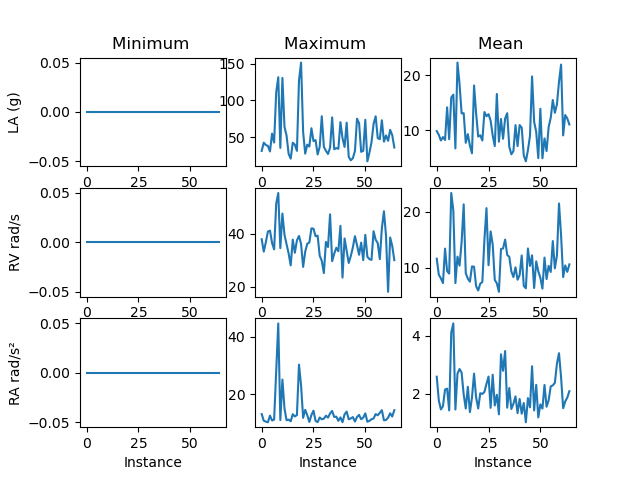

When compared in this way, it is obvious that several instances of maximum linear acceleration and maximum rotational acceleration are unusually high in comparison to the rest of their respective plots. For me, selecting a third feature for analysis was not so intuitive. However, because both of the other features that I selected were maximums, I decided that the maximum rotational velocity would be the best additional feature to analyze.

After determining which three features to use, I made scatter plots of each of the features versus the other features for a total of three scatter plots, shown below.

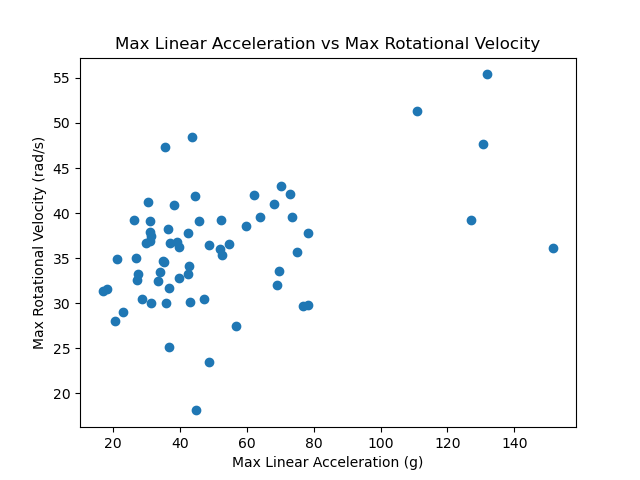

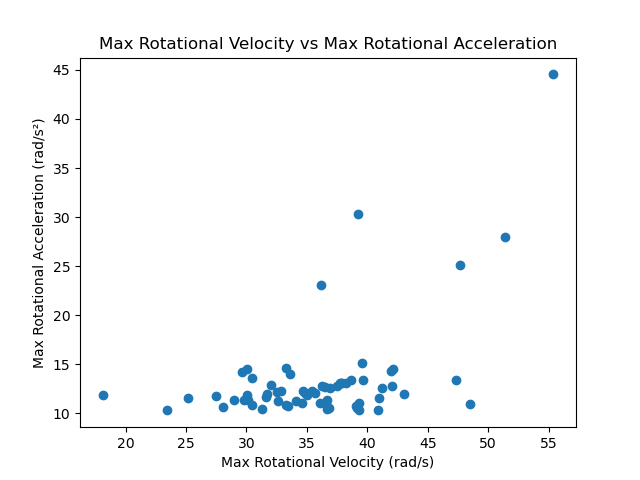

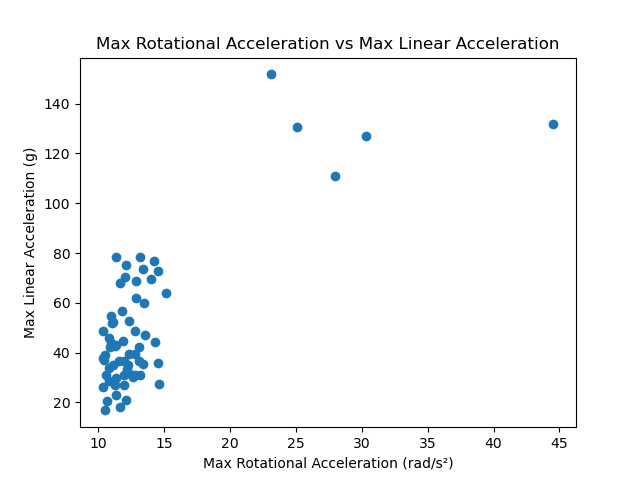

This final plot comparing max rotational acceleration and max linear acceleration shows the most pronounced difference between the 5 "different" instances and the rest of the data. This is unsurprising as these features were the two that I immediately identified as being the most useful in identifying the "different" data.

At this point, I was confident in my selection of features. Thus, I found the five maximum values in each of the features and their corresponding instances in the data. These instances (in order of ascending values) were:

8, 19, 11, 9, 20 in maximum linear acceleration,

34, 11, 60, 8, 9 in maximum rotational velocity, and

20, 11, 8, 19, 9 in maximum rotational acceleration.

The instances listed for maximum linear acceleration are the same instances listed for maximum rotational acceleration. In fact, I also specifically noticed the peculiarity of each of these instances when analyzing the plots that I created for each individual instance. In all, this suggests that instances 8, 9, 11, 19, and 20 were statistically different from the rest of the data. For example, compare Instance 7 (a "normal" instance) and Instance 8 (a "different" instance) in the plots below.

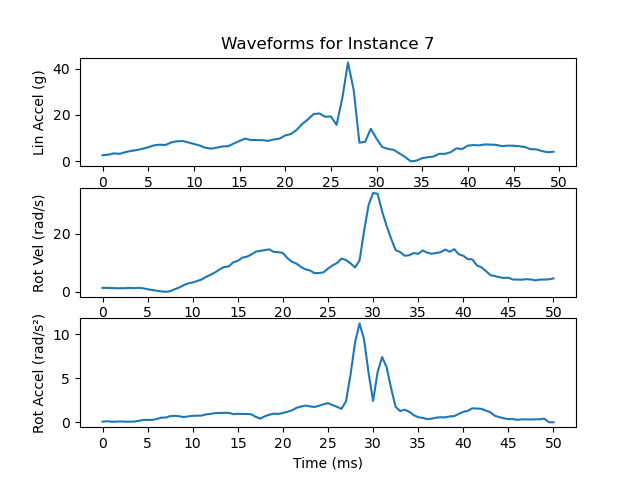

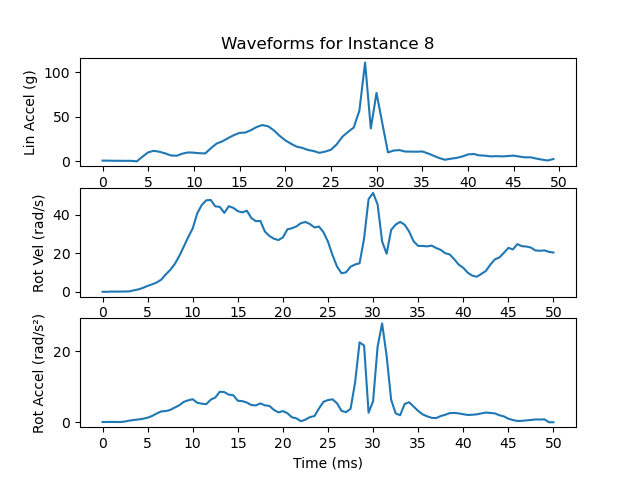

In Instance 7, you can see that the peaks in the data for linear acceleration tend to top out around 40 to 50. Likewise, the peaks in the data for rotational velocity tend not to exceed 40 and the peaks in the data for rotational velocity tend not to exceed 15 in "normal" instances. However, all of these typical peaks are exceeded in Instance 8. The linear acceleration of Instance 8 is particularly high compared to that of Instance 7.

After completing this visual data exploration, I can confidently say that instances 8, 9, 11, 19, and 20 should be analyzed further to determine why their data is so "different" from the other instances. The cause could be an important result in the experiment being conducted or it could point towards some sort of instrumental failure.